In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


sds


In [ ]:
df = pd.read_csv('датасет_для_ДЗ.csv')

print("информация о датасете:")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
print("Первые 10 строк:")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
print("Описательная статистика:")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [ ]:
print("Статистика только для объектов:")
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [18]:
print("Количество занимаемых мест по уровню опыта")
print(df['experience_level'].value_counts())

Количество занимаемых мест по уровню опыта
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


Частотное распределение числовых признаков


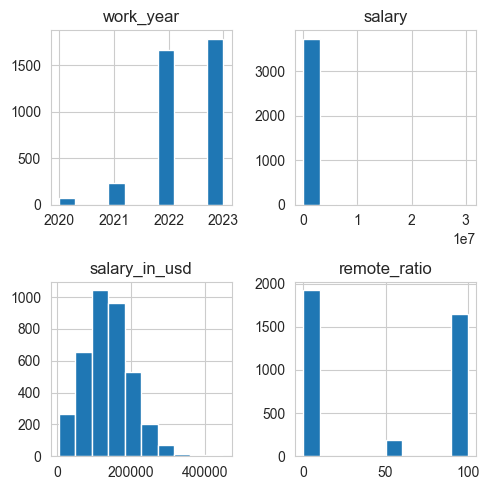

In [24]:
print("Частотное распределение числовых признаков")
df.hist(figsize=(5,5))
plt.tight_layout()
plt.show()

In [22]:
# 3. Удалите / заполните / замените пропуски или ошибки в данных
print("Количество пропусков в данных:")
print(df.isnull().sum())


Количество пропусков в данных:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# 4. Удаление дубликатов
print("Количество дубликатов до удаления:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

#print("\nКоличество дубликатов после удаления:")
#print(df.duplicated().sum())


Выбросы по зп:


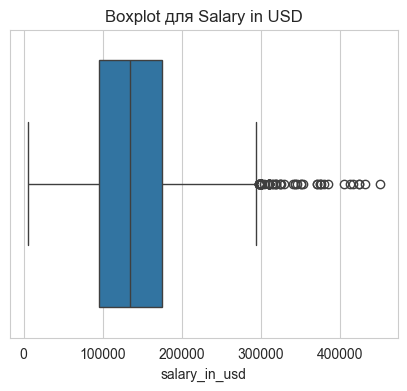

In [40]:
# 5. Аналитика
print("Выбросы по зп:")
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot для Salary in USD')
plt.show()

In [45]:

print("Данные по самым высокооплачиваемым специалистам:")
outliers_sorted = df.sort_values(by='salary_in_usd', ascending=False)
outliers_sorted.head(10)

Данные по самым высокооплачиваемым специалистам:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M


Соотношение уровня опыта и заработной платы в долларах США


DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

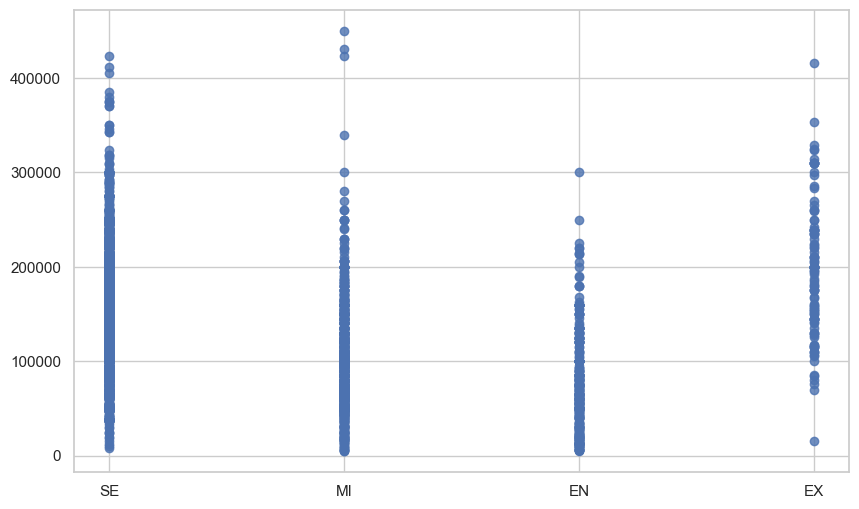

In [55]:
print("Соотношение уровня опыта и заработной платы в долларах США")
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the scatterplot
sns.regplot(data=df, x="experience_level", y="salary_in_usd")

# Add title and labels
plt.title("Experience Level vs Salaries in USD", fontsize=16)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()